

# Retinopatía diabética: detección de ceguera

### APTOS 2019 Ceguera

La retinopatía diabética es una enfermedad que afecta la retina del ojo. Millones en todo el mundo sufren de esta enfermedad.

Actualmente, el diagnóstico ocurre mediante el uso de una técnica llamada fotografía de fondo de ojo, que consiste en fotografiar la parte posterior del ojo.

El examen médico para la retinopatía diabética se produce en todo el mundo, pero es más difícil para las personas que viven en zonas rurales.

Mediante el aprendizaje automático y la visión por computadora, intentamos automatizar el proceso de diagnóstico, que actualmente se realiza de forma manual por los médicos. 

En Kaggle (https://www.kaggle.com/c/aptos2019-blindness-detection/data  tendremos acceso a un conjunto de datos de decenas de miles de imágenes clínicas del mundo real de pacientes sanos y patentes con la enfermedad, y etiquetadas por médicos capacitados.

Con este conjunto de datos, podremos entrenar un modelo de aprendizaje automático para lograr un alto nivel de precisión al predecir la aparición de la enfermedad en pacientes.


## Resultados

Entrenamos nuestro modelo en un conjunto de datos combinado de aproximadamente 40,000 imágenes. 



## Contenido:

El siguiente cuaderno se ha organizado de la siguiente manera:

1. El código se ha enumerado inicialmente primero, y se ha dividido aproximadamente en las siguientes partes clave. Vale la pena revisar este código y, a medida que lea la siguiente sección principal de discusión del experimento, puede consultar la sección del código según corresponda.

     - Importaciones y configuración
     - Analisis exploratorio de datos
     - Métricas( validacion)
     - Extraccion de caracteristicas
     - Experimentos
     - referencias

---

# Resumen

El siguiente es un resumen de cómo abordé el problema y está más o menos en el orden de cómo aborde el proyecto. En cada etapa, el objetivo era encontrar la mejor configuración que me permitiera avanzar en cada experimento, y pasé mucho tiempo conociendo los datos, la línea de base y tratando de descubrir errores durante el proceso de capacitación.

Aproximadamente, el orden de las operaciones para este proyecto se detalla a continuación:

1. Importacion y configuracion
2. Bases de procesamiento de imágenes
3. Análisis exploratorio de datos
4. Agregar/eliminar Datos
5. Extraccion de caracteristicas
6. metodologıa de validacion
7. Analisis individual
8. Extraccion de caracterısticas por el metodo PCA
9. Resultados

### Experimentos


*   Naıve Bayes
*   K vecinos mas cercanos
*   Redes Neuronales Artificiales
*   Random Forest
*   Maquinas de Soporte Vectorial con kernel lineal y con kernel RBF.



### Cosas que no intentamos

-   Redes neuronales convolucionales
-   Kapa Cohen


---------
#1) Importaciones y configuración

La siguiente celda contiene todo el código de configuración para cada inicialización cada vez que reinicia el núcleo

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os,sys
import random


import progressbar
from pylab import *


import numpy as np #mayor soporte para vectores y matrices
import pandas as pd #estructuras de datos similares a los dataframes
import PIL #para abrir, manipular y guardar muchos formatos de archivos de imágenes
import cv2 #biblioteca libre de visión artificial 



from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.listdir('/content/drive/My Drive/input/aptos2019-blindness-detection')

['test.csv',
 'sample_submission.csv',
 'train.csv',
 'test_images',
 'train_images']

In [0]:
base_dir = '/content/drive/My Drive/input/aptos2019-blindness-detection'
train_dir = os.path.join(base_dir, 'train_images/')
train = pd.read_csv(os.path.join(base_dir, 'train.csv'))
train['path'] = train['id_code'].map(lambda x: os.path.join(train_dir, '{}.png'.format(x)))
train = train.drop(columns = ['id_code'])
train = train.sample(frac=1).reset_index(drop=True) #shuffle dataframe

test_dir = os.path.join(base_dir, 'test_images/')
test = pd.read_csv(os.path.join(base_dir, 'test.csv'))
test['path'] = test['id_code'].map(lambda x: os.path.join(test_dir, '{}.png'.format(x)))
test = test.drop(columns = ['id_code'])
test = test.sample(frac=1).reset_index(drop=True) #shuffle dataframe

---------
#2) Bases de datos

In [0]:
# Descargar los datos
!pip install kaggle
!kaggle competitions download -c aptos2019-blindness-detection -p "{base_dir}"

---------
#3)Análisis de datos exploratorios (EDA)

Antes de comenzar cualquier entrenamiento, tratamos de tener una buena idea de los datos en bruto, comprender sus distribuciones y explorar sus características e idiosincrasias.

Conocer nuestro conjunto de datos es un primer paso importante y nos ayuda a ajustar nuestro modelo hacia predicciones más precisas.

Tamaño de cada uno de los conjuntos de datos:

In [0]:
print("tamaño del conjunto de entrenamiento: {}".format(len(train)))
print("tamaño del conjunto de validacion:: {}".format(len(test)))

tamaño del conjunto de entrenamiento: 3662
tamaño del conjunto de validacion:: 1928


In [0]:
train.head()

diagnosis                                               path
0          3  /content/drive/My Drive/input/aptos2019-blindn...
1          2  /content/drive/My Drive/input/aptos2019-blindn...
2          0  /content/drive/My Drive/input/aptos2019-blindn...
3          0  /content/drive/My Drive/input/aptos2019-blindn...
4          1  /content/drive/My Drive/input/aptos2019-blindn...

In [0]:
test.head()

path
0  /content/drive/My Drive/input/aptos2019-blindn...
1  /content/drive/My Drive/input/aptos2019-blindn...
2  /content/drive/My Drive/input/aptos2019-blindn...
3  /content/drive/My Drive/input/aptos2019-blindn...
4  /content/drive/My Drive/input/aptos2019-blindn...

### Desequilibrio de datos

Podemos ver aquí que existe un desequilibrio de datos definitivo con los datos suministrados. Un gran porcentaje de las imágenes que llegan son en realidad normales, en lugar de contener retinopatía diabética.

Nos ocupamos de este desequilibrio eliminando aleatoriamente muestras de  las clases mas dominantes.

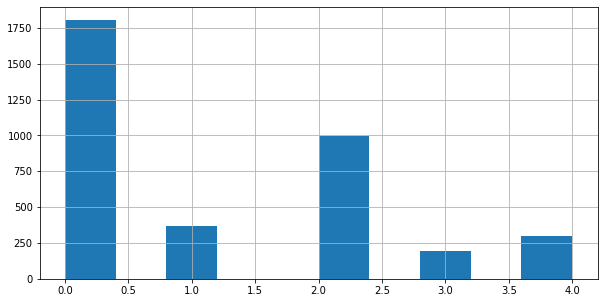

In [0]:
# comprobación de desequilibrios de datos
train['diagnosis'].hist(figsize=(10,5), bins=10)

podemos ver que muchas imágenes de entrenamiento están en la clase 0

In [0]:
train_width, train_height = [], []
for i in range(len(train)):
    image = Image.open(train['path'][i])
    width, height = image.size
    train_width.append(width)
    train_height.append(height)
    
test_width, test_height = [], []
for i in range(len(test)):
    image = Image.open(test['path'][i])
    width, height = image.size
    test_width.append(width)
    test_height.append(height)

In [0]:
train['width'] = train_width
train['height'] = train_height
test['width'] = test_width
test['height'] = test_height

In [0]:
for df in [train, test]:
    df['width_height_ratio'] = df['height'] / df['width']
    df['width_height_added'] = df['height'] + df['width']

In [0]:
train.head()

diagnosis  ... width_height_added
0          3  ...               4152
1          2  ...               4546
2          0  ...               3584
3          0  ...               3584
4          1  ...               4152

[5 rows x 8 columns]

In [0]:
test.head()

path  ...  width_height_added
0  /content/drive/My Drive/input/aptos2019-blindn...  ...                1120
1  /content/drive/My Drive/input/aptos2019-blindn...  ...                1120
2  /content/drive/My Drive/input/aptos2019-blindn...  ...                1120
3  /content/drive/My Drive/input/aptos2019-blindn...  ...                1120
4  /content/drive/My Drive/input/aptos2019-blindn...  ...                1120

[5 rows x 7 columns]

+ comparación del ancho de la imagen del entrenamiento, la altura y el ancho, la altura de la imagen de prueba
+ podemos ver la diferencia en la distribución

Text(0.5, 1.0, 'test width height ratio')

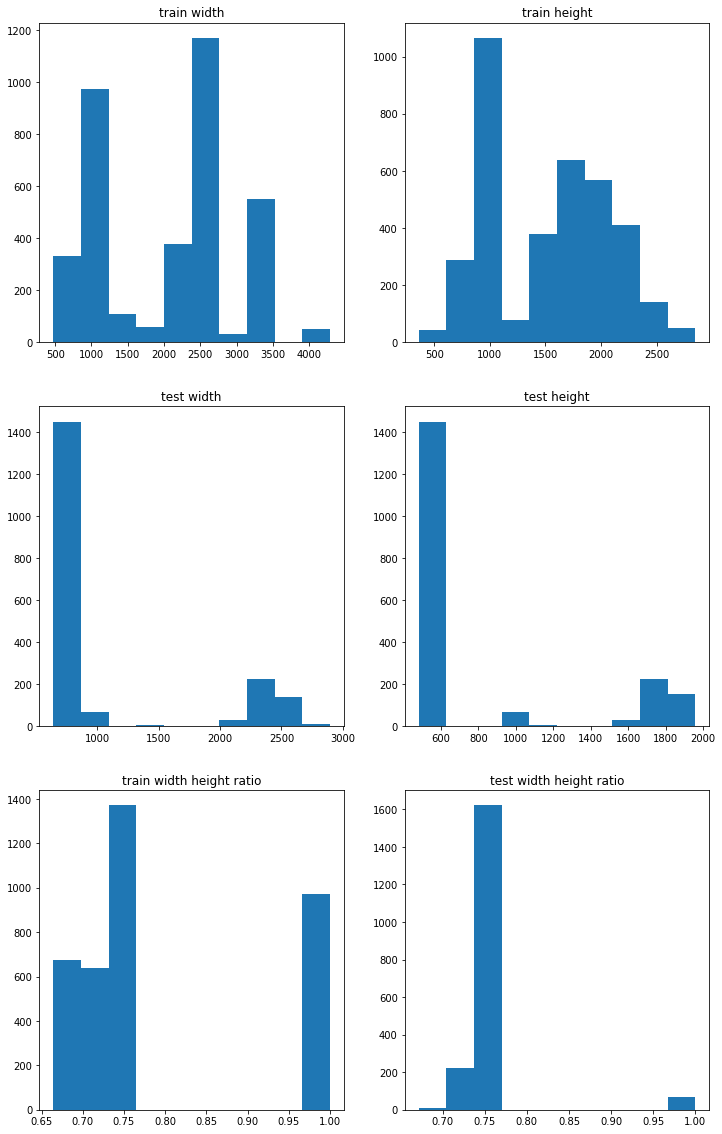

In [0]:
fig = plt.figure(figsize=(12,20))
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax6 = fig.add_subplot(3, 2, 6)

ax1.hist(train['width'])
ax1.set_title("train width")

ax3.hist(test['width'])
ax3.set_title("test width")

ax2.hist(train['height'])
ax2.set_title("train height")

ax4.hist(test['height'])
ax4.set_title("test height")

ax5.hist(train['width_height_ratio'])
ax5.set_title("train width height ratio")

ax6.hist(test['width_height_ratio'])
ax6.set_title("test width height ratio")

+ muchas imágenes en el conjunto de prueba son muy pequeñas en comparación con el conjunto de entrenamiento

Text(0.5, 1.0, 'ancho de prueba alto agregado')

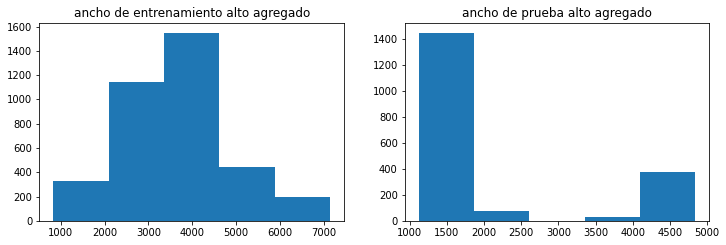

In [0]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

ax1.hist(train['width_height_added'], bins=5)
ax1.set_title("ancho de entrenamiento alto agregado")

ax2.hist(test['width_height_added'], bins=5)
ax2.set_title("ancho de prueba alto agregado")

In [0]:
train['width_height_added'].describe()

count    3662.000000
mean     3542.006827
std      1419.133265
min       832.000000
25%      2100.000000
50%      3584.000000
75%      4546.000000
max      7136.000000
Name: width_height_added, dtype: float64

In [0]:
test['width_height_added'].describe()

count    1928.000000
mean     1826.688278
std      1280.116549
min      1120.000000
25%      1120.000000
50%      1120.000000
75%      1433.000000
max      4840.000000
Name: width_height_added, dtype: float64

Se puede compararlo con estadísticas simples

In [0]:
train.groupby(['diagnosis'])['width_height_added'].mean()

diagnosis
0    2640.090305
1    4256.110811
2    4450.339339
3    4431.564767
4    4506.861017
Name: width_height_added, dtype: float64

puede ver que la clase 0 en el juego de entrenamiento tiene un tamaño relativamente pequeño de ancho y alto

Visualizar imágenes de entrenamiento

In [0]:
train_class0 = [] 
train_class1 = []
train_class2 = []
train_class3 = []
train_class4 = []

num_sample = 10

for path in train[train.diagnosis == 0].sample(num_sample)['path']:
    im = Image.open(path)
    train_class0.append(im)
    
for path in train[train.diagnosis == 1].sample(num_sample)['path']:
    im = Image.open(path)
    train_class1.append(im)
    
for path in train[train.diagnosis == 2].sample(num_sample)['path']:
    im = Image.open(path)
    train_class2.append(im)
    
for path in train[train.diagnosis == 3].sample(num_sample)['path']:
    im = Image.open(path)
    train_class3.append(im)
    
for path in train[train.diagnosis == 4].sample(num_sample)['path']:
    im = Image.open(path)
    train_class4.append(im)

## clase de entrenamiento 0 (sin DR)

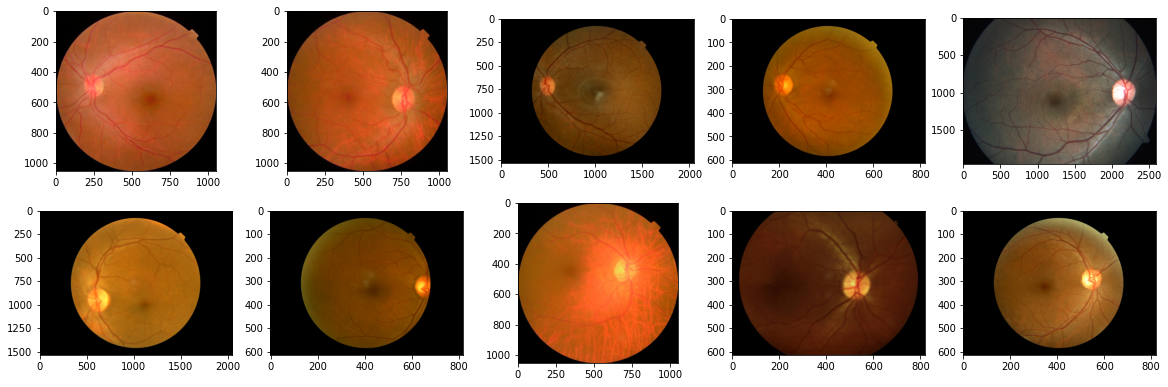

In [0]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(train_class0):
    plt.subplot(len(train_class0) / columns + 1, columns, i + 1)
    plt.imshow(image)

## entrenamiento clase 1 (leve)

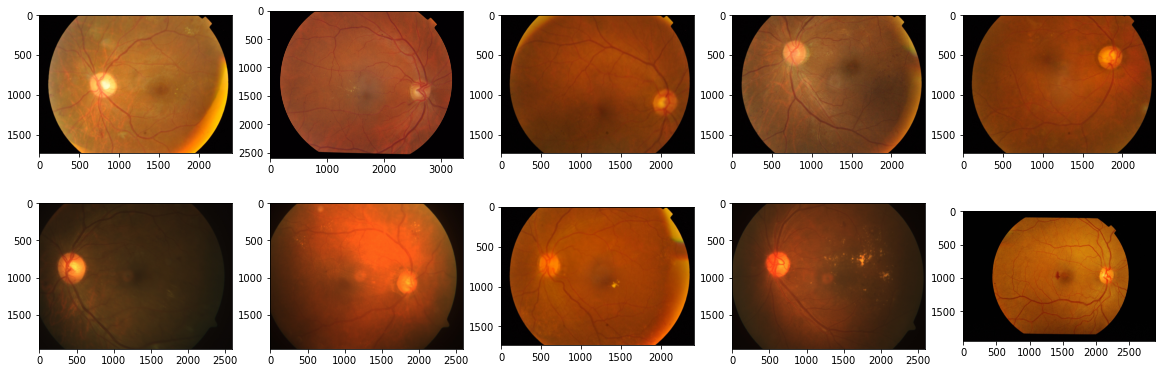

In [0]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(train_class1):
    plt.subplot(len(train_class1) / columns + 1, columns, i + 1)
    plt.imshow(image)

## clase de entrenamiento 2 (moderado)

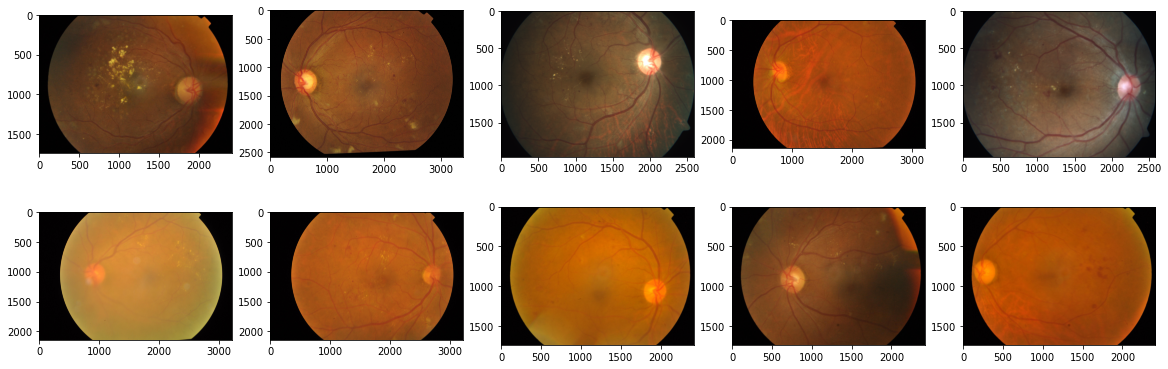

In [0]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(train_class2):
    plt.subplot(len(train_class2) / columns + 1, columns, i + 1)
    plt.imshow(image)

## entrenamiento clase 3 (Severo)

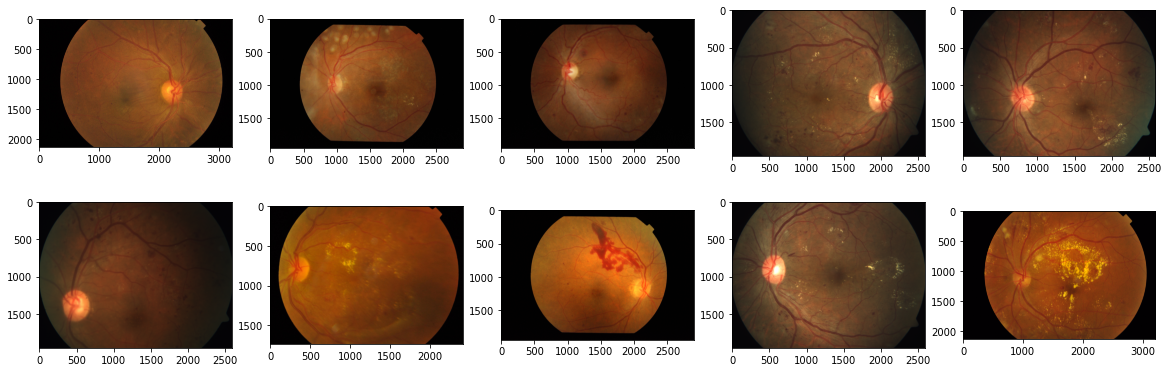

In [0]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(train_class3):
    plt.subplot(len(train_class3) / columns + 1, columns, i + 1)
    plt.imshow(image)

## entrenamiento clase 4 (DR proliferativo)

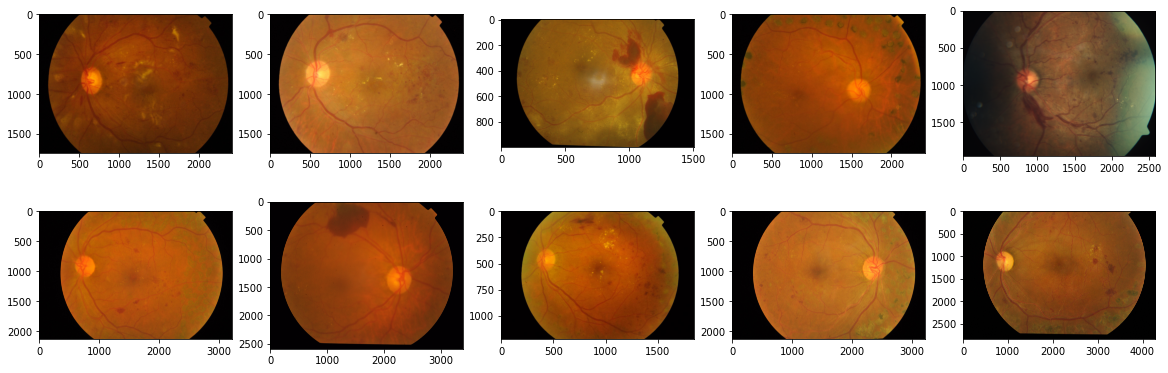

In [0]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(train_class4):
    plt.subplot(len(train_class4) / columns + 1, columns, i + 1)
    plt.imshow(image)

# 3.1)Visualizar imágenes de prueba

In [0]:
test.head()

path  ...  width_height_added
0  /content/drive/My Drive/input/aptos2019-blindn...  ...                1120
1  /content/drive/My Drive/input/aptos2019-blindn...  ...                1120
2  /content/drive/My Drive/input/aptos2019-blindn...  ...                1120
3  /content/drive/My Drive/input/aptos2019-blindn...  ...                1120
4  /content/drive/My Drive/input/aptos2019-blindn...  ...                1120

[5 rows x 7 columns]

In [0]:
test.describe()

ancho       altura  ...  width_height_ratio  width_height_added
count  1928.000000  1928.000000  ...         1928.000000         1928.000000
mean   1043.535788   783.152490  ...            0.755328         1826.688278
std     740.511732   541.308109  ...            0.048644         1280.116549
min     640.000000   480.000000  ...            0.671271         1120.000000
25%     640.000000   480.000000  ...            0.750000         1120.000000
50%     640.000000   480.000000  ...            0.750000         1120.000000
75%     819.000000   614.000000  ...            0.750000         1433.000000
max    2896.000000  1958.000000  ...            1.000000         4840.000000

[8 rows x 6 columns]

In [0]:
# width + height < 1500 => small image
# width + height > 4000 => large image

test_image_small = []
test_image_large = []

for path in test[test.width_height_added < 1500].sample(30)['path']:
    im = Image.open(path)
    test_image_small.append(im)
    
for path in test[test.width_height_added > 4000].sample(30)['path']:
    im = Image.open(path)
    test_image_large.append(im)

## imágenes de prueba (tamaño pequeño)

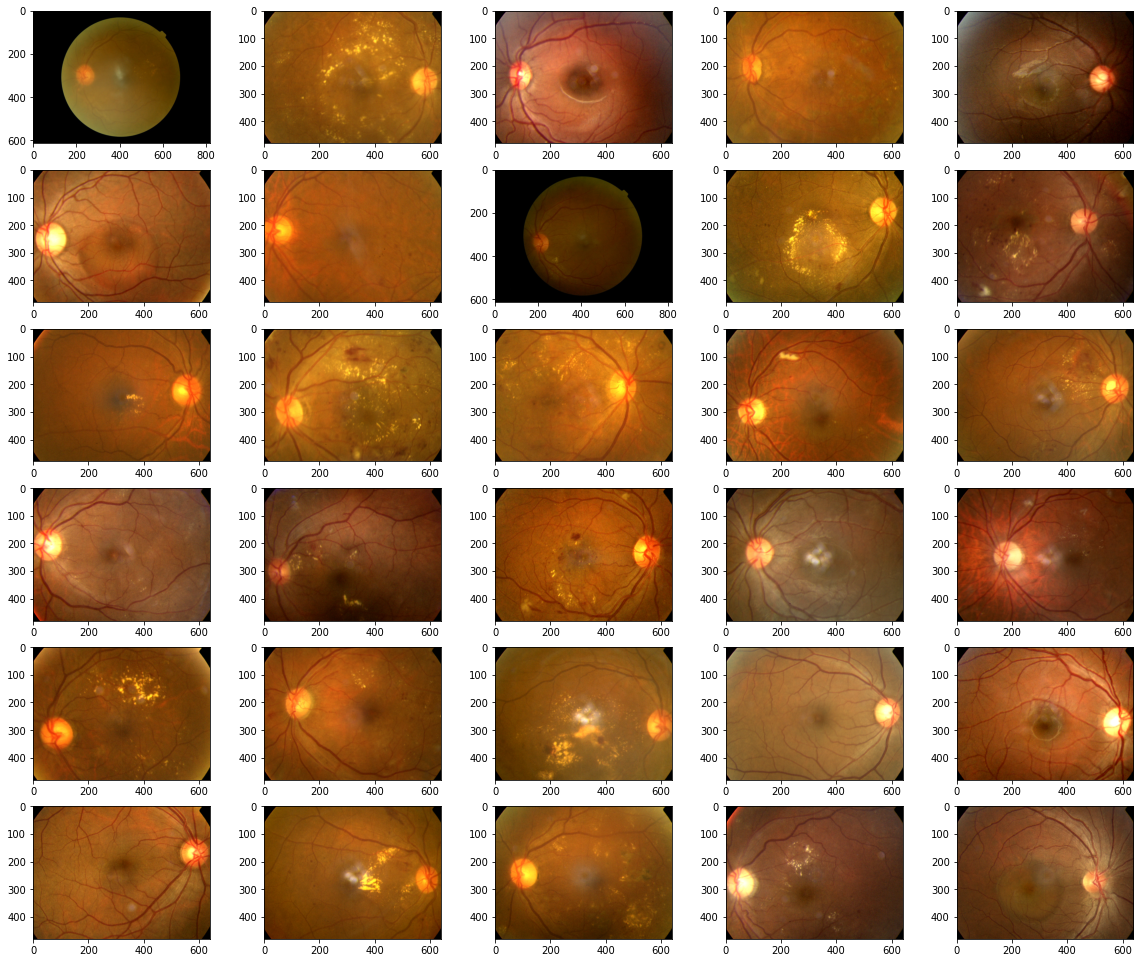

In [0]:
plt.figure(figsize=(20,20))
columns = 5

for i, image in enumerate(test_image_small):
    plt.subplot(len(test_image_small) / columns + 1, columns, i + 1)
    plt.imshow(image)

+ el tamaño pequeño de las imágenes de prueba tiene una clase cercana a 4 ( a simple vista)
+ en el conjunto de entrenamiento, es probable que la clase 0 tenga un tamaño de imagen pequeño. lo que significa ** la distribución de clases es muy diferente en el conjunto de entrenamiento y pruebas **

## imágenes de prueba (tamaño grande)

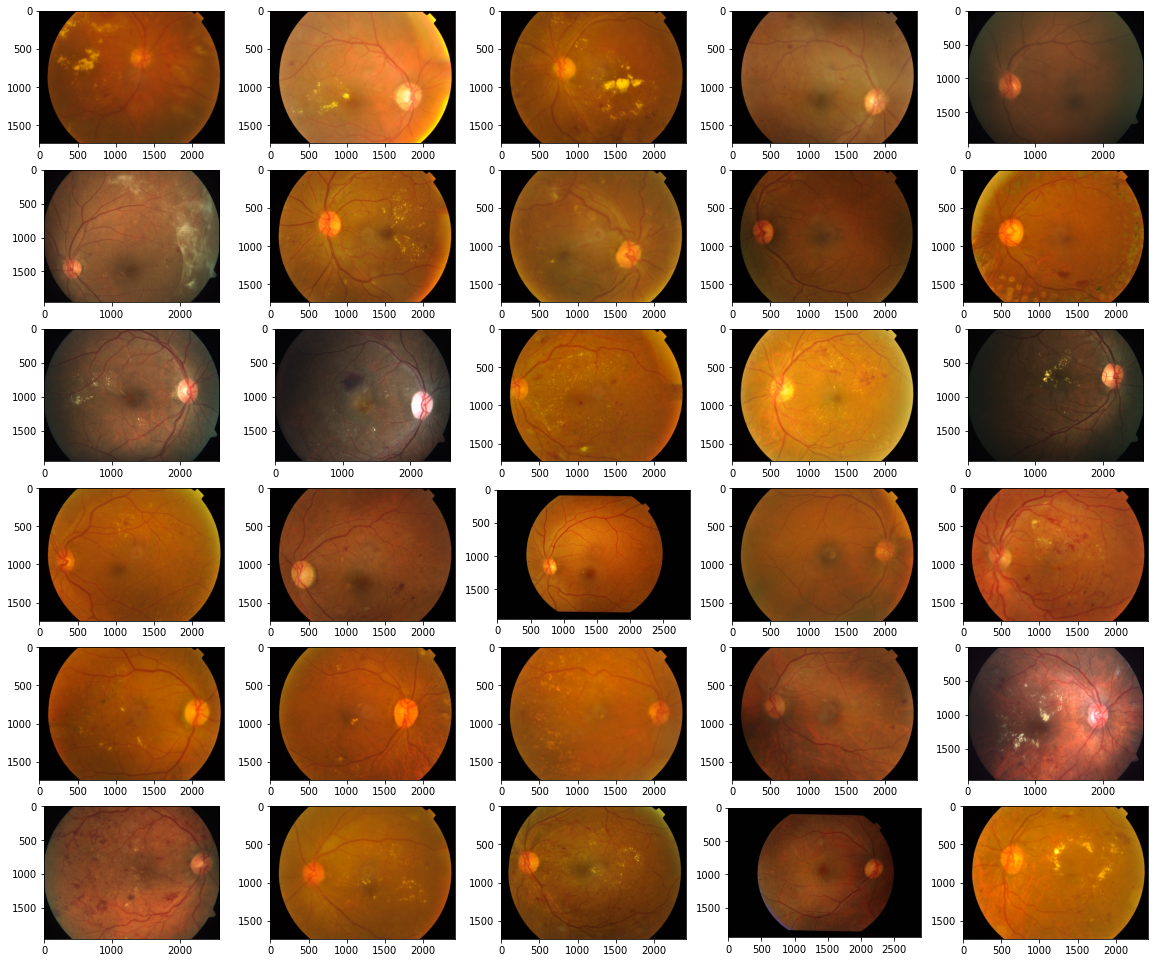

In [0]:
plt.figure(figsize=(20,20))
columns = 5

for i, image in enumerate(test_image_large):
    plt.subplot(len(test_image_large) / columns + 1, columns, i + 1)
    plt.imshow(image)

veamos lo mismo para las imágenes de entrenamiento

In [0]:
train_image_small = []
train_image_large = []

for path in train[train.width_height_added < 1500].sample(30)['path']:
    im = Image.open(path)
    train_image_small.append(im)
    
for path in train[train.width_height_added > 4000].sample(30)['path']:
    im = Image.open(path)
    train_image_large.append(im)

## imágenes del entrenamiento (tamaño pequeño)

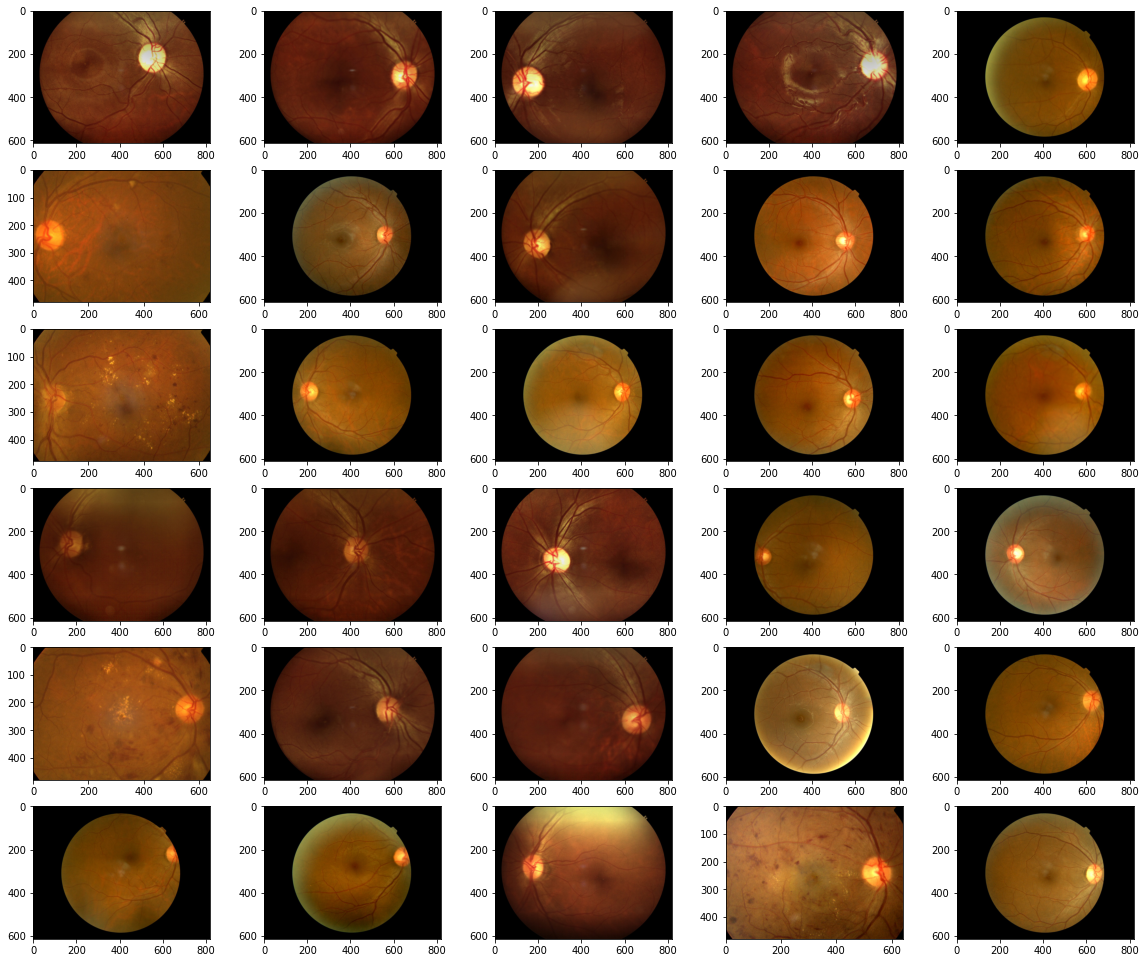

In [0]:
plt.figure(figsize=(20,20))
columns = 5

for i, image in enumerate(train_image_small):
    plt.subplot(len(train_image_small) / columns + 1, columns, i + 1)
    plt.imshow(image)

## imágenes del entrenamiento (gran tamaño)

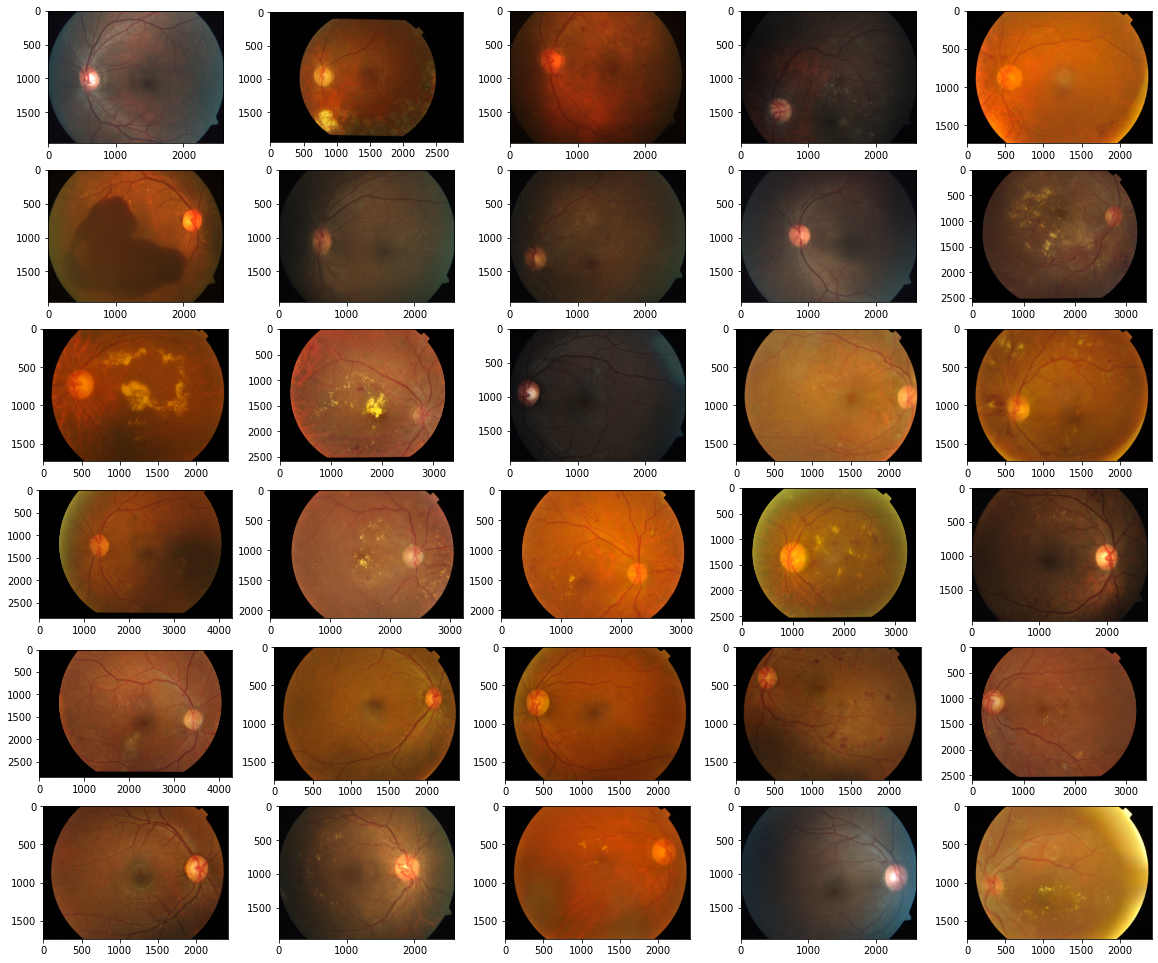

In [0]:
plt.figure(figsize=(20,20))
columns = 5

for i, image in enumerate(train_image_large):
    plt.subplot(len(train_image_large) / columns + 1, columns, i + 1)
    plt.imshow(image)

---------
#4)Agregar/eliminar Datos

Al contar con recursos en hardware y tiempos tan limitados , se escogio uno de los trabajos de kaggle que ya habia hecho el pre-procesamiento de las imagenes ,este procesamiento consistio en un cambio al tamaño de las imagenes (1024) y eliminacion de gran parte del area oscura de la imagen.Luego de ello se eliminaron imagenenes de manera aleatoria en aquellas clases con mayor dominancia ( clase 0 )

---------
#5)Extraccion de caracteristicas

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

In [0]:
import os
files = os.listdir("/content/gdrive/My Drive/input/diabetic-retinopathy-resized/resized_train/resized_train")
print(len(files))

35126


Debemos recordar que: "Cada píxel de una imagen almacena la información de su tono o luminosidad, donde el tono negro es el valor 0 y el blanco el valor más alto (normalmente 255 en escala de grises), pero en formato binario".

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def modificar_imagen_1(imagen):
  dpi = 80 #inch
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  target_size = (512,512)
  imagen = cv2.resize(imagen,target_size)
  height, width = imagen.shape
  SCALE=2
  figsize = (width / float(dpi))/SCALE, (height / float(dpi))/SCALE
  fig = plt.figure(figsize=figsize)
  plt.imshow(imagen, cmap='gray')
  return imagen
  

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

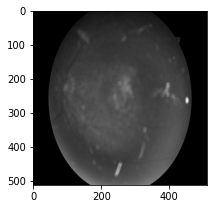

In [0]:
image_test = cv2.imread('/content/gdrive/My Drive/input/diabetic-retinopathy-resized/resized_train/resized_train/44268_left.jpeg')
modificar_imagen_1(image_test)

In [0]:
IMG_SIZE = 512

In [0]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

def load_ben_color(path, sigmaX=10):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
        
    return image

In [0]:
def modificar_imagen_2(ruta_imagen):
  dpi = 80 #inch
  image = load_ben_color(ruta_imagen,sigmaX=10)
  target_size = (512,512)
  image = cv2.resize(image, target_size)
  #height, width = IMG_SIZE, IMG_SIZE
  #print(height, width)
  #SCALE=1
  #figsize = (width / float(dpi))/SCALE, (height / float(dpi))/SCALE
  #fig = plt.figure(figsize=figsize)
  #plt.imshow(image, cmap='gray')
  return image

In [0]:
print(modificar_imagen_2('/content/gdrive/My Drive/input/diabetic-retinopathy-resized/resized_train/resized_train/44268_left.jpeg').shape)

(512, 512, 3)


In [0]:
def extraer_caracteristicas(imagen):
  surf  = cv2.xfeatures2d.SURF_create(5000)
  #calculate keypoints and their orientation
  keypoints = surf.detectAndCompute(imagen,None)[1]
  try:
    to_reshape=keypoints.shape[0]*keypoints.shape[1]
  except:
    print("Error")
    return []
  return keypoints.reshape(to_reshape)

In [0]:
imagen = modificar_imagen_2('/content/gdrive/My Drive/input/diabetic-retinopathy-resized/resized_train/resized_train/44268_left.jpeg')
print(len(extraer_caracteristicas(imagen=imagen)))

2560


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [0]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
from skimage.transform import resize
from imgaug import augmenters as iaa
from tqdm import tqdm
import PIL
#from PIL import Image, ImageOps2322
import cv2
from sklearn.utils import class_weight, shuffle
from keras.losses import binary_crossentropy
from keras.applications.resnet50 import preprocess_input
import keras.backend as K
import tensorflow as tf
from sklearn.metrics import f1_score, fbeta_score
from keras.utils import Sequence
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

WORKERS = 2
CHANNEL = 3

import warnings
warnings.filterwarnings("ignore")
IMG_SIZE = 512
NUM_CLASSES = 5
SEED = 77
TRAIN_NUM = 1000 

Using TensorFlow backend.


In [0]:
df_train = pd.read_csv('/content/gdrive/My Drive/input/diabetic-retinopathy-resized/2trainLabels_cropped')
#df_test = pd.read_csv('../input/aptos2019-blindness-detection/test.csv')

x = df_train['image']
y = df_train['level']

x, y = shuffle(x, y, random_state=SEED)

(11991,) (11991,) (2117,) (2117,)


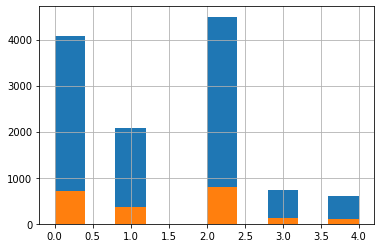

In [0]:
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.15,
                                                      stratify=y, random_state=SEED)
print(train_x.shape, train_y.shape, valid_x.shape, valid_y.shape)
train_y.hist()
valid_y.hist()

In [0]:
df_train.set_index(['image','level'],inplace=True)

In [0]:
for i in df_train.index:
  print(i)

Se han truncado las últimas 5000 líneas del flujo de salida.
('14992_right', 2.0)
('15000_right', 2.0)
('15023_right', 2.0)
('15034_left', 2.0)
('15034_right', 2.0)
('15056_right', 2.0)
('15066_right', 2.0)
('15074_left', 2.0)
('15074_right', 2.0)
('15080_left', 2.0)
('15083_left', 2.0)
('15095_left', 2.0)
('15114_right', 2.0)
('15117_left', 2.0)
('15117_right', 2.0)
('15120_left', 2.0)
('15120_right', 2.0)
('15138_left', 2.0)
('15138_right', 2.0)
('15154_left', 2.0)
('15154_right', 2.0)
('15185_left', 2.0)
('15185_right', 2.0)
('15193_left', 2.0)
('15193_right', 2.0)
('15222_right', 2.0)
('15225_right', 2.0)
('15257_right', 2.0)
('15273_left', 2.0)
('15273_right', 2.0)
('15274_right', 2.0)
('15276_left', 2.0)
('15276_right', 2.0)
('15278_left', 2.0)
('15278_right', 2.0)
('15297_left', 2.0)
('15297_right', 2.0)
('15302_left', 2.0)
('15302_right', 2.0)
('15309_left', 2.0)
('15309_right', 2.0)
('15351_right', 2.0)
('15354_left', 2.0)
('15354_right', 2.0)
('15375_right', 2.0)
('15385_left

In [0]:
array_X = []
array_Y = []

for i in df_train.index:
  j = 0
  path=f"/content/gdrive/My Drive/input/diabetic-retinopathy-resized/resized_train/resized_train/{i[0]}.jpeg"
  image = cv2.imread(path)
  image = modificar_imagen_2(ruta_imagen=path)
  caracteristicas = extraer_caracteristicas(image)
  if len(caracteristicas) >= 150:
      array_X.append(caracteristicas[0:150])
      array_Y.append(i[1])
  print(i[1])

Se han truncado las últimas 5000 líneas del flujo de salida.
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
Error
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
Error
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
Error
2.0
2.0
2.0
2.0
2.0
2.0
2

In [0]:
Y = np.asarray(array_Y)

In [0]:
x.shape

(14108,)

In [0]:
Y.shape

(13518,)

In [0]:
dataframe = pd.DataFrame(Y)

In [0]:
dataframe.to_csv("Y_labels")

---------
#6) metodologıa de validacion


In [0]:
def error_logistic(Y_pred, Y_true):
    error = 0
    for ye, y in zip(Y_pred, Y_true):
        if ye != y:
            error += 1
    error = float(error)/float(np.size(Y_pred))
    
    return error

---------
#7) Analisis individual


---------
#8) Extraccion de caracterısticas por el metodo PCA


In [0]:
import os,sys
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import progressbar
from pylab import *

In [0]:
df_resized = pd.read_csv('2trainLabels_cropped')
df_resized.set_index(['image','level'],inplace=True)
df_resized.head()

In [0]:
len(df_resized)

In [0]:
def get_images_vectors():
    X_list = []
    Y_list = []
    k = 0
    
    with progressbar.ProgressBar(max_value=len(df_resized)) as bar:
        for i,j in df_resized.index:
            imagen = Image.open("resized_train/"+i+".jpeg")
            rzs= imagen.resize((350,350))
            arr_rzs=array(rzs.convert('L'))
            arr_res=arr_rzs.reshape(122500)
            X_list.append(arr_res)
            Y_list.append(j)
            k += 1
            bar.update(k)
        return np.array(X_list),np.array(Y_list)

In [0]:
X,Y= get_images_vectors()

In [0]:
print(X.shape,Y.shape)

In [0]:
df_X = pd.DataFrame(X)

In [0]:
df_Y = pd.DataFrame(Y)

In [0]:
df_X.head()

In [0]:
lista_indices=[]
for i in range (122500):
    np_arr = np.array(df_X[i])
    if int(np.mean(np_arr)) <= 10:
        lista_indices.append(i)

In [0]:
len(lista_indices)

In [0]:
df_X.drop(lista_indices,axis=1,inplace= True)

In [0]:
df_X.head()

In [0]:
df_X.to_json("features_X.json")

In [0]:
df_Y.to_json("labels_Y.json")

In [0]:
X_prueba = np.array(df_X)

In [0]:
X_prueba[:7000,:].shape

In [0]:
import pylab as pl
from sklearn.decomposition import PCA

In [0]:
n_components = 100

In [0]:
print("Extracting the top %d components from %d images" %(n_components, X_prueba[:13000,:].shape[0]))
pca = PCA(n_components=n_components,svd_solver='randomized',whiten=True)

%time pca.fit(X_prueba[:13000,:])

In [0]:
plt.plot(np.cumsum(pca.explained_variance_/np.sum(pca.explained_variance_)))
plt.title('Varianza acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza acumulada')
plt.grid()

In [0]:
X_pca = pca.transform(X_prueba)

In [0]:
np.savetxt('X_features_2',X_pca,delimiter=',')

In [0]:
np.savetxt('Y_labels_2',Y,delimiter=',')

In [0]:
X_pca.shape

In [0]:
Y.shape

---------
#9)  Resultados

---------
# EXPERIMENTOS

Se realizaron varios experimentos para determinar los mejores hiperparámetros para la red. A continuación se presentan algunos de los experimentos clave que se realizaron, detallados para resaltar el proceso experimental y el flujo de trabajo.

Nuestro problema es de clasificacion se evaluo el uso
de los siguientes modelos de prediccion y se documenta
los resultados de las simulaciones realizadas:
- Na¨ıve Bayes
- K vecinos m´as cercanos
- Redes Neuronales Artificiales
- Random Forest
- M´aquinas de Soporte Vectorial con kernel lineal y
con kernel RBF.

##*   Naıve Bayes


In [0]:
pip install qgrid

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture
from numpy import random
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from numpy import matlib
import qgrid

In [0]:
#X = np.genfromtxt('Data_PCA/X_features.csv',delimiter=',')
X = np.genfromtxt('/content/drive/My Drive/Experimentos/X_features.csv',delimiter=',')
Y = np.genfromtxt('/content/drive/My Drive/Experimentos/Y_labels.csv',delimiter=',')

In [0]:
print('Tamaño X: ',X.shape)
print('Tamaño Y: ', Y.shape)

Tamaño X:  (14108, 150)
Tamaño Y:  (14108,)


In [0]:
def error_logistic(Y_pred, Y_true):
    error = 0
    for ye, y in zip(Y_pred, Y_true):
        if ye != y:
            error += 1
    error = float(error)/float(np.size(Y_pred))
    
    return error

In [0]:
def Naive_Bayes():
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    Error = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    j = 0
        
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]
        
        #Se normalizan los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = preprocessing.scale(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
        
        
        modelo = GaussianMixture(covariance_type='diag')
        modelo.fit(Xtrain,Ytrain)
        
        #Validación con muestras de entrenamiento
        Ytrain_pred = modelo.predict(Xtrain)
        
        #Validación con las muestras de test    
        Yest = modelo.predict(Xtest)
        
        
        Error[j] = error_logistic(Y_pred=Yest,Y_true=Ytest)
        
        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[j] = np.mean(Ytrain_pred == Ytrain)
        EficienciaVal[j] = np.mean(Yest == Ytest)
        j += 1
        
      
    return np.mean(EficienciaVal), np.std(EficienciaVal),np.mean(Error),np.std(Error) 

In [0]:
eficiencia_val, ic_val,error, std_error = Naive_Bayes()
print("Eficiencia validacion: "+str(eficiencia_val)+" con Intervalo de confianza: "+str(ic_val))
print("Error: "+str(error)+" con desviación estandar: "+str(std_error))

Eficiencia validacion: 0.34037425574142327 con Intervalo de confianza: 0.00014176353841791056
Error: 0.6596257442585767 con desviación estandar: 0.00014176353841793832


##*   K vecinos m´as cercanos


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from numpy import random
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from numpy import matlib
import qgrid

In [0]:
X = np.genfromtxt('Data_PCA/X_features.csv',delimiter=',')
Y = np.genfromtxt('Data_PCA/Y_labels.csv',delimiter=',')

In [0]:
print('Tamaño X: ',X.shape)
print('Tamaño Y: ', Y.shape)

In [0]:
def error_logistic(Y_pred, Y_true):
    error = 0
    for ye, y in zip(Y_pred, Y_true):
        if ye != y:
            error += 1
    error = float(error)/float(np.size(Y_pred))
    
    return error

In [0]:
def K_vecinos(vecinos):
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    Error = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    j = 0
        
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]
        
        #Se normalizan los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = preprocessing.scale(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
        
        
        modelo = KNeighborsClassifier(n_neighbors=vecinos)
        modelo.fit(Xtrain,Ytrain)
        
        #Validación con muestras de entrenamiento
        Ytrain_pred = modelo.predict(Xtrain)
        
        #Validación con las muestras de test    
        Yest = modelo.predict(Xtest)
        
        
        Error[j] = error_logistic(Y_pred=Yest,Y_true=Ytest)
        
        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[j] = np.mean(Ytrain_pred == Ytrain)
        EficienciaVal[j] = np.mean(Yest == Ytest)
        j += 1
        
    print("Modelo entrenado con "+ str(vecinos)+ " vecinos")
    
    return np.mean(EficienciaVal), np.std(EficienciaVal),np.mean(Error),np.std(Error)    

In [0]:
import qgrid

randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de vecinos' : pd.Series([1, 2, 3, 4, 5, 6, 7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39])})
df_types["Eficiencia en validacion"] = ""
df_types["Intervalo de confianza"] = ""
df_types["Error"] = ""
df_types["Std Error"] = ""
df_types.set_index(['Numero de vecinos'], inplace=True)

In [0]:
i = 0
for vecinos in df_types.index:   
    eficiencia_val, ic_val,error, std_error = K_vecinos(vecinos)
    df_types["Eficiencia en validacion"][vecinos]=str(eficiencia_val)
    df_types["Intervalo de confianza"][vecinos] = str(ic_val)
    df_types["Error"][vecinos] = str(error)
    df_types["Std Error"][vecinos] = str(std_error)
    i=i+1

In [0]:
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget
qgrid_widget.get_changed_df()

In [0]:
df_types

##*   Redes Neuronales Artificiales


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from numpy import random
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from numpy import matlib
import qgrid

In [0]:
X = np.genfromtxt('Data_PCA/X_features.csv',delimiter=',')
Y = np.genfromtxt('Data_PCA/Y_labels.csv',delimiter=',')

In [0]:
print('Tamaño X: ',X.shape)
print('Tamaño Y: ', Y.shape)

In [0]:
def error_logistic(Y_pred, Y_true):
    error = 0
    for ye, y in zip(Y_pred, Y_true):
        if ye != y:
            error += 1
    error = float(error)/float(np.size(Y_pred))
    
    return error

In [0]:
def redes_neuronales(neuronas, capas_ocultas):
    capas = (neuronas)
    if capas_ocultas == 2:
        capas = (neuronas,neuronas)
    elif capas_ocultas == 3:
        capas = (neuronas,neuronas,neuronas)
    elif capas_ocultas == 4:
        capas = (neuronas,neuronas,neuronas,neuronas)
    elif capas_ocultas == 5:
        capas = (neuronas,neuronas,neuronas,neuronas,neuronas)
    elif capas_ocultas == 6:
        capas = (neuronas,neuronas,neuronas,neuronas,neuronas,neuronas)        
        
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    Error = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    j = 0
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]
        
        #Se normalizan los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = preprocessing.scale(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
        
        #Llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
        mlp = MLPClassifier(hidden_layer_sizes=capas,activation = 'relu',max_iter=1000)
        mlp.fit(Xtrain,Ytrain)
        
        #Validación con las muestras de entrenamiento
        Ytrain_pred = mlp.predict(Xtrain)

        #Validación con las muestras de test    
        Yest = mlp.predict(Xtest)
        
        Error[j] = error_logistic(Y_pred=Yest,Y_true=Ytest)
        

        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[j] = np.mean(Ytrain_pred == Ytrain)
        EficienciaVal[j] = np.mean(Yest == Ytest)
        j += 1
    print("Modelo entrenado con " + str(neuronas) + " neuronas y con " + str(capas_ocultas) + " capas ocultas" )    
    
    return np.mean(EficienciaVal), np.std(EficienciaVal),np.mean(Error),np.std(Error)

In [0]:
df_types = pd.DataFrame({
    'N. de capas ocultas' : pd.Series([1,1,1,1,1,1,1,1,1,1,1,
                                       2,2,2,2,2,2,2,2,2,2,2,
                                       3,3,3,3,3,3,3,3,3,3,3,
                                       4,4,4,4,4,4,4,4,4,4,4,
                                       5,5,5,5,5,5,5,5,5,5,5]),
    
    'Neuronas por capa' : pd.Series([10,20,30,40,50,60,70,80,90,100,120,
                                    10,20,30,40,50,60,70,80,90,100,120,
                                    10,20,30,40,50,60,70,80,90,100,120,
                                    10,20,30,40,50,60,70,80,90,100,120,
                                    10,20,30,40,50,60,70,80,90,100,120])})
df_types["Eficiencia en validacion"] = ""
df_types["Intervalo de confianza"] = ""
df_types["Error"] = ""
df_types["Std Error"] = ""
df_types.set_index(['N. de capas ocultas','Neuronas por capa'], inplace=True)

In [0]:
for cap,neu in df_types.index:
    eficiencia_val, ic_val,error, std_error=redes_neuronales(neuronas=neu,capas_ocultas=cap)
    df_types["Eficiencia en validacion"][cap,neu] = str(eficiencia_val) # remplazar valores
    df_types["Intervalo de confianza"][cap,neu] = str(ic_val)
    df_types["Error"][cap,neu] = str(error)
    df_types["Std Error"][cap,neu] = str(std_error)
df_types

In [0]:
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget
qgrid_widget.get_changed_df()

##*   Random Forest


In [0]:
from __future__ import division
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy import stats
#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
from sklearn.decomposition import PCA
import pandas as pd

In [0]:
df_x = pd.read_csv('/content/drive/My Drive/Experimentos/X_features.csv')
df_y = pd.read_csv('/content/drive/My Drive/Experimentos/Y_labels.csv')

In [0]:
X = pd.DataFrame.to_numpy(df_x)
Y = pd.DataFrame.to_numpy(df_y)

In [0]:
print(X.shape)
print(Y.shape)

In [0]:
print(Y.data[0:5])

In [0]:
import math
import numpy as np
from numpy import random
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from numpy import matlib

def prueba(max_d=5,info=False):
    #Validamos el modelo
    profundidad = max_d
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    j = 0
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]

        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
        model = DecisionTreeClassifier(max_depth=profundidad)
        model.fit(Xtrain,Ytrain)


        #Validación
        #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
        Ytrain_pred = model.predict(Xtrain)
        #Use el modelo previamente entrenado para hacer predicciones con las muestras de test
        Yest = model.predict(Xtest)     

        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
        EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
        j += 1
    if info:
        print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
        print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))
    return np.mean(EficienciaVal), np.std(EficienciaVal)

In [0]:
pip install qgrid

In [0]:
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Maxima profundidad' : pd.Series([5,8,10,12,15])})
df_types["Eficiencia en validacion"] = ""
df_types["Intervalo de confianza"] = ""

df_types.loc[0, "Eficiencia en validacion"] = 0.0 ## 
df_types.loc[0,"Intervalo de confianza"] = 0.0 ## reemplace por el valor


In [0]:
#df_types.set_index(['Maxima profundidad'], inplace=True)
#df_types.sort_index(inplace=True)
profundidad = [5,8,10,12,15]
for i in df_types.index:
    Eficiencia_val, Intervalo_conf = prueba(max_d=profundidad[i])    
    df_types.loc[i, "Eficiencia en validacion"] = str(Eficiencia_val)
    df_types.loc[i,"Intervalo de confianza"] = str(Intervalo_conf)


qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget
qgrid_widget.get_changed_df()

In [0]:
from sklearn.ensemble import RandomForestClassifier
import time
#Validamos el modelo
def prueba_rf(n_trees,n_features, info=False, bagging = False):
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    j = 0
    t_entrenamiento_array = []
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]

        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

        
        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
    
        model = RandomForestClassifier(n_estimators= n_trees,max_features= n_features)
        t_inic = time.clock()
        model.fit(Xtrain,Ytrain)
        t_final = time.clock()
        t_entrenamiento= t_final - t_inic
        t_entrenamiento_array.append(t_entrenamiento)

        #Validación
        #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
        Ytrain_pred = model.predict(Xtrain)
        #Use el modelo previamente entrenado para hacer predicciones con las muestras de test
        Yest = model.predict(Xtest)
        
        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
        EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
        j += 1
    if info:
        print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
        print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))
        return np.mean(t_entrenamiento_array)
    return np.mean(EficienciaVal),np.std(EficienciaVal)

In [0]:
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de arboles' : pd.Series([5,5,5,5,5,5,10,10,10,10,10,10,20,20,20,20,20,20,50,50,50,50,50,50,100,100,100,100,100,100]),
    'Variables analizadas por nodo' : pd.Series([5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30])})
df_types["Eficiencia en validacion"] = ""
df_types["Intervalo de confianza"] = ""
#df_types.sort_index(inplace=True)
n_arb = [5,5,5,5,5,5,10,10,10,10,10,10,20,20,20,20,20,20,50,50,50,50,50,50,100,100,100,100,100,100]
n_var = [5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30]
for i in df_types.index:
    Efi_val, Interv_conf = prueba_rf(n_trees=n_arb[i], n_features=n_var[i], info=False)
    df_types.loc[i, "Eficiencia en validacion"]=str(Efi_val)
    df_types.loc[i, "Intervalo de confianza"] = str(Interv_conf)
    


#df_types.loc[0, "Eficiencia en validacion"]=0.8778
#df_types.loc[0, "Intervalo de confianza"] = 0.0143

In [0]:
df_types.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget
qgrid_widget.get_changed_df()

In [0]:
X.shape[1]

In [0]:
eficiencia, std_eficiencia = prueba_rf(n_trees=50,n_features=40)
print("Eficiencia en validacion con Bagging: "+str(eficiencia)+" con desviación estandar de: "+str(std_eficiencia))

##*   Maquinas de Soporte Vectorial con kernel lineal y con kernel 

In [0]:
from __future__ import division
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy import stats
#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")
%matplotlib inline

In [0]:
from sklearn.decomposition import PCA
import pandas as pd

In [0]:
df_x = pd.read_csv('Features_X')
df_y = pd.read_csv('Y_labels')

In [0]:
df_y.drop(['Unnamed: 0'],axis=1, inplace = True)
df_x.drop(['Unnamed: 0'],axis=1, inplace = True)

In [0]:
X = pd.DataFrame.to_numpy(df_x)
Y = pd.DataFrame.to_numpy(df_y)

In [0]:
print(X.shape)
print(Y.shape)

In [0]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=109) # 70% training and 30% test

In [0]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [0]:
import math
import numpy as np
from numpy import random
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold

#X_train, X_test, y_train, y_test
#Validamos el modelo
Folds = 4
random.seed(19680801)
EficienciaTrain = np.zeros(Folds)
EficienciaVal = np.zeros(Folds)
skf = StratifiedKFold(n_splits=Folds)
j = 0
for train, test in skf.split(X, Y):
    X_train = X[train,:]
    y_train = Y[train]
    X_test = X[test,:]
    y_test = Y[test]
    
    #Normalizamos los datos
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
    modelo = SVC(gamma='scale',decision_function_shape='ovr')
    modelo.fit(X_train,y_train)
    
    
    #Validación
    Ytrain_pred = modelo.predict(X_train)
    Yest = modelo.predict(X_test)
    
    #Evaluamos las predicciones del modelo con los datos de test
    EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == y_train.ravel())
    EficienciaVal[j] = np.mean(Yest.ravel() == y_test.ravel())
    j += 1
        
print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))

In [0]:
import pandas as pd
import qgrid
df_types = pd.DataFrame({
    'Kernel' : pd.Series(['linear','linear','linear','linear','linear','linear','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf']),
    'C' : pd.Series([0.001,0.01,0.1,1,10,100,0.001,0.001,0.001,0.01,0.01,0.01,0.1,0.1,0.1,1,1,1,10,10,10,100,100,100]),
    'gamma' : pd.Series([0,0,0,0,0,0,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1])})
df_types["Eficiencia en validacion"] = ""
df_types["Intervalo de confianza"] = ""
df_types["% de Vectores de Soporte"] = ""
df_types.set_index(['Kernel','C','gamma'], inplace=True)

In [0]:
def prueba_svm(ker='linear',conf=0.001,gam=0.0):
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    porc_vectores = np.zeros(Folds)
    j = 0
    
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]

        #Normalizamos los datos
        scaler = preprocessing.StandardScaler().fit(Xtrain)
        Xtrain = scaler.transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        
        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
        if ker == 'linear':
            modelo = SVC(kernel =ker, C=conf)
        else:
            modelo = SVC(kernel=ker, C= conf, gamma= gam)
        modelo.fit(Xtrain,Ytrain)


        #Validación
        Ytrain_pred = modelo.predict(Xtrain)
        Yest = modelo.predict(Xtest)

        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
        EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
        porc_vectores[j] = len(modelo.support_vectors_)/len(Xtrain)
        j += 1

    print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
    print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))
    
    eficiencia = np.mean(EficienciaVal)
    int_conf = np.std(EficienciaVal)
    porc_vect = np.mean(porc_vectores)
    
    return eficiencia,int_conf,porc_vect

In [0]:
#df_types.loc[3,"Eficiencia en validacion"] = "0.97077"
#df_types.loc[3,"Intervalo de confianza"] = "0.01548"
#df_types.loc[3, "% de Vectores de Soporte"] = "0.2620"
#df_types.sort_index(inplace=True)
j = 0
for i in df_types.index:
    print(i)
    kernel = i[0]
    c = i[1]
    gamma = i[2]    
    efi,ic,porcentaje=prueba_svm(ker=kernel,conf=c,gam=gamma)
    df_types.loc[i,"Eficiencia en validacion"] = str(efi)
    df_types.loc[i,"Intervalo de confianza"] = str(ic)
    df_types.loc[i, "% de Vectores de Soporte"] = str(porcentaje)
    j = j+1
    print(efi,ic,porcentaje)

#CORRELACCION

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [0]:
X = np.genfromtxt('/content/drive/My Drive/Experimentos/X_features.csv',delimiter=',')
Y = np.genfromtxt('/content/drive/My Drive/Experimentos/Y_labels.csv',delimiter=',')

#df_x = pd.read_csv('/content/drive/My Drive/Experimentos/dataframep/Features_X.csv')
#df_y = pd.read_csv('/content/drive/My Drive/Experimentos/dataframep/Y_labels.csv')

In [0]:
#X_featuresxx.csv
df_x = pd.read_csv('/content/drive/My Drive/Experimentos/dataframep/X_featuresxx.csv')

In [0]:
X = pd.DataFrame.to_numpy(df_x)
Y = pd.DataFrame.to_numpy(df_y)

In [0]:
print(X.shape)
print(Y.shape)

(14108, 150)
(14108,)


In [0]:
df_x.head(8)

Unnamed: 0             1  ...           149           150
0         0.0 -2.270000e+17  ...  1.970000e+18  6.450000e+17
1         0.0  1.160000e+17  ... -3.160000e+16 -8.880000e+16
2         0.0  1.450000e+18  ...  1.390000e+17 -1.940000e+17
3         0.0  4.190000e+17  ... -1.250000e+18  1.310000e+18
4         0.0  2.150000e+18  ...  1.770000e+18  7.000000e+17
5         0.0 -1.720000e+17  ... -9.760000e+16 -8.180000e+17
6         0.0 -2.870000e+17  ... -1.130000e+17 -9.140000e+16
7         0.0  7.690000e+17  ...  4.380000e+17 -8.300000e+17

[8 rows x 151 columns]

In [0]:
pearsoncorr = df_x.corr(method='pearson')
pearsoncorr

Unnamed: 0         1         2  ...       148       149       150
Unnamed: 0    1.000000 -0.049577  0.001535  ... -0.002052 -0.002265  0.004382
1            -0.049577  1.000000  0.001045  ...  0.006973  0.006593 -0.002917
2             0.001535  0.001045  1.000000  ...  0.004286  0.001611  0.007933
3             0.000143  0.028304  0.003435  ... -0.018229 -0.010323 -0.004032
4             0.017330 -0.004918 -0.011720  ... -0.000513 -0.004476  0.004949
...                ...       ...       ...  ...       ...       ...       ...
146          -0.004103 -0.002536  0.012779  ... -0.002862 -0.007243  0.025635
147           0.001290 -0.006652  0.005961  ...  0.011808  0.002073  0.003168
148          -0.002052  0.006973  0.004286  ...  1.000000  0.029618 -0.006117
149          -0.002265  0.006593  0.001611  ...  0.029618  1.000000  0.002188
150           0.004382 -0.002917  0.007933  ... -0.006117  0.002188  1.000000

[151 rows x 151 columns]

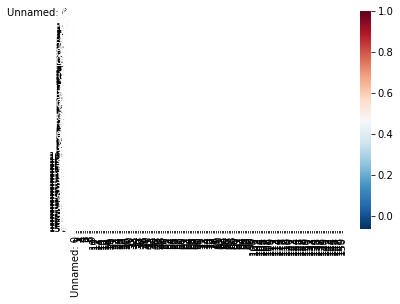

In [0]:
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [0]:
data = pd.read_csv('/content/drive/My Drive/Experimentos/dataframep/X_featuresxx.csv') 
data.shape 

(14108, 151)

In [0]:
data['1'].describe() 

count    1.410800e+04
mean    -2.298155e+16
std      1.010254e+18
min     -2.580000e+18
25%     -7.630000e+17
50%     -6.510000e+16
75%      6.552500e+17
max      4.190000e+18
Name: 1, dtype: float64

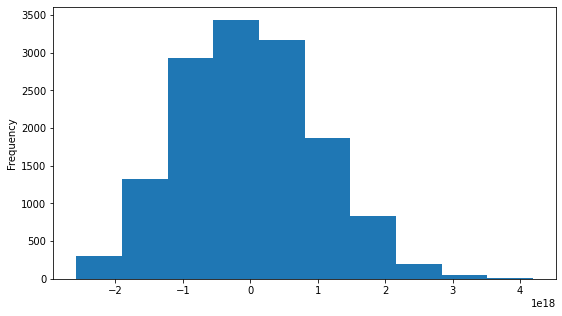

In [0]:
plt.figure(figsize = (9, 5)) 
data['1'].plot(kind ="hist") 

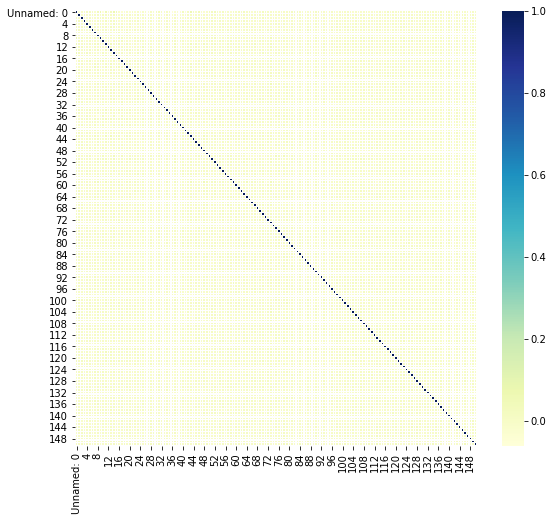

In [0]:
corrmat = data.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sb.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

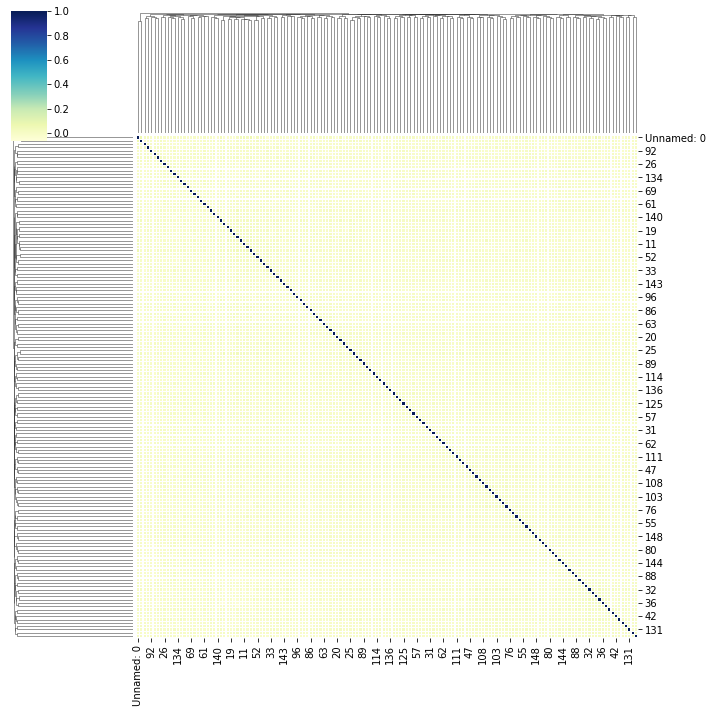

In [0]:
corrmat = data.corr() 
  
cg = sb.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 

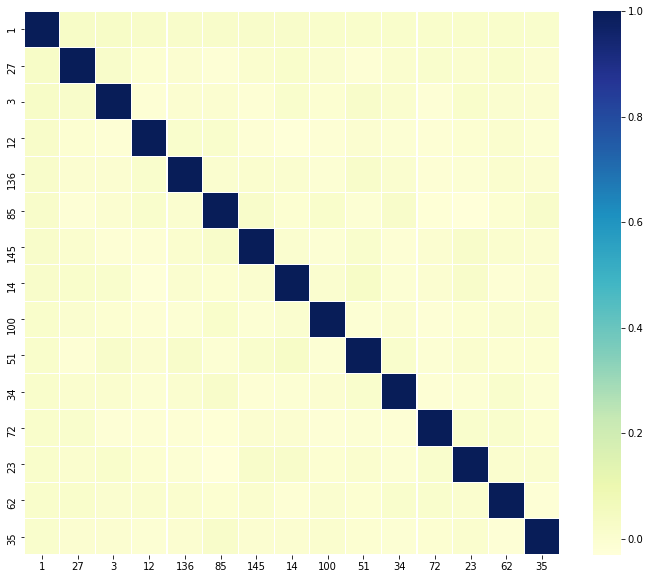

In [0]:
# saleprice correlation matrix 
# k : number of variables for heatmap 
k = 15 
  
cols = corrmat.nlargest(k, '1')['1'].index 
  
cm = np.corrcoef(data[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sb.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values) 

In [0]:


data = pd.read_csv("/content/drive/My Drive/Experimentos/X_features.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Output hidden; open in https://colab.research.google.com to view.

In [0]:
import pandas as pd
import numpy as np

In [0]:
data = pd.read_csv("/content/drive/My Drive/Experimentos/dataframe/DATA.csv")

In [0]:
data.head()

In [0]:
# load data
#url = "https://raw.githubusercontent.com/JuanCarlosCalle/SIMULACION/DATA.csv"
url = "https://raw.githubusercontent.com/JuanCarlosCalle/SIMULACION/master/DATA.csv"
#url = "https://github.com/JuanCarlosCalle/SIMULACION/blob/master/DATA.csv"
names = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64','65','66','67','68','69','70','71','72','73','74','75','76','77','78','79','80','81','82','83','84','85','86','87','88','89','90','91','92','93','94','95','96','97','98','99','100','101','102','103','104','105','106','107','108','109','110','111','112','113','114','115','116','117','118','119','120','121','122','123','124','125','126','127','128','129','130','131','132','133','134','135','136','137','138','139','140','141','142','143','144','145','146','147','148','149','150','151']
dataframe = pd.read_csv(url, names=names)

In [0]:
array = dataframe.values
X = array[:,0:150]
Y = array[:,150]

------------------------------------------------

In [0]:
import scipy.io

Dividir datos en conjunto de entrenamiento y pruebas

In [0]:
#from sklearn.cross_validation import train_test_split	
from sklearn.model_selection import train_test_split	     
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

In [0]:
print (X_train)

[[-1.57199734 -0.90775711  0.76974882 ...  0.00824464  0.41454952
  -0.53376566]
 [ 0.95516417 -0.94732923  0.08610242 ...  1.20644033  1.13635779
   0.29364191]
 [-0.1181139  -0.63560264 -0.46509128 ...  0.65754895 -0.02038723
  -1.8238369 ]
 ...
 [-0.32861461 -0.47166055 -0.02973802 ...  0.36081646 -0.03352984
   0.02530128]
 [-0.49914442  0.58026143 -1.33035938 ... -0.98264735  1.31241166
  -1.43072395]
 [ 0.88009764  0.57353773 -0.05439542 ...  0.03906364 -0.48132318
   1.23130395]]


In [0]:
pip install git+https://github.com/jundongl/scikit-feature.git

  Cloning https://github.com/jundongl/scikit-feature.git to /tmp/pip-req-build-bgbe7j3f
  Running command git clone -q https://github.com/jundongl/scikit-feature.git /tmp/pip-req-build-bgbe7j3f
  Created wheel for skfeature: filename=skfeature-1.0.0-cp36-none-any.whl size=61493 sha256=60b020a1ca90e9f54563dbbd9593ae25432bd302c1f18261d7a04bddc8a959bd
  Stored in directory: /tmp/pip-ephem-wheel-cache-ejsoqkic/wheels/5f/b4/c0/c8e13a8fbfaed3dd4b778d6788a3f9044d02b97a820a37f435
Successfully built skfeature


Realizar selección de características en el conjunto de entrenamientoTomamos el algoritmo Fisher Score como ejemplo para explicar cómo realizar la selección de características en el conjunto de entrenamiento. Primero, calculamos los puntajes de fisher de todas las características usando el conjunto de entrenamiento.

In [0]:
			 
from skfeature.function.similarity_based import fisher_score		     
score = fisher_score.fisher_score(X_train, y_train)		     
print (score)



[2.46597899e-03 2.07524293e-04 6.12974209e-04 1.81557495e-03
 1.12837072e-03 3.28391225e-04 3.08213736e-03 1.27727383e-03
 6.81627440e-03 4.19439071e-03 4.69409654e-03 2.11723317e-03
 3.21167746e-03 4.58483672e-03 2.32539242e-03 1.99514016e-03
 1.21676938e-03 6.36310796e-04 1.58363181e-03 1.90997649e-03
 2.48751141e-04 1.53040928e-03 3.65983140e-04 1.50032890e-03
 9.46157581e-04 2.49016714e-04 4.07355940e-03 1.13982632e-03
 4.56595614e-04 4.41171732e-04 2.25449174e-04 1.70782255e-03
 2.18227311e-04 7.93369336e-04 1.61078264e-04 2.09079988e-03
 2.29571051e-03 8.32935584e-04 1.17019079e-03 1.38071067e-03
 9.68021848e-04 1.30834019e-03 4.85859336e-03 1.18673542e-04
 9.65063261e-04 1.06733625e-03 3.73390413e-04 2.63087809e-03
 3.78925038e-04 6.91590380e-04 1.16948686e-03 9.43055623e-04
 1.02773434e-03 1.52143924e-04 7.78762632e-04 4.89274173e-04
 4.30887108e-04 1.27871839e-03 3.58378037e-04 1.40628656e-04
 2.63252644e-04 1.08998985e-03 8.97705651e-04 1.51049989e-04
 7.06079240e-04 6.230021

In [0]:
idx = fisher_score.feature_ranking(score)		     
print (idx)

#Clasifique las características en orden descendente de acuerdo con los puntajes de fisher
# y genera el índice de clasificación:

[  8  42  10  13   9  26  12   6  47   0  14  36  11  35  15  19   3  31
  81  97 148  18 141  21  23  39 133  41  57   7  16  38  50 126 115  27
   4  61  45  52 110 143  40  44  69  24  51  77  99  62  68  37  80  33
  54  75 136 109  71  64 111 129  49  98  17 103  65 135   2 131 145  74
 114 139 120  55 132  85 147 138  93  28  29  56  73 108  84 128 122  90
 116  48  87  95  46 149  72  22 134 130 105 112  58 127   5 142  86 104
 121 125 123  70 140 124  60  91  66  89  25  20  82  79 102 137  30 144
  32   1  92 107 101  34  88  78 118  83  53  63 106  59 113  96 119  43
 100 146  94  76 117  67]


Especifique el número de características seleccionadas (por ejemplo, 100) para el propósito de evaluación:

In [0]:
num_fea = 100		     
selected_features_train = X_train[:, idx[0:num_fea]]		     
selected_features_test = X_test[:, idx[0:num_fea]]
		     
print (selected_features_train)

[[ 0.53143629 -0.03853045  0.41885148 ...  0.16276687 -0.01198656
   0.62872483]
 [-0.4393084  -0.76605879  0.62868319 ... -1.2151065   0.34268671
   0.82526281]
 [ 1.4648048   0.6433108  -1.63692017 ...  0.33208299 -2.58704269
   1.52082942]
 ...
 [ 0.24619369  0.40367563  1.09753147 ...  0.74664175 -0.54676965
   0.2310721 ]
 [ 0.42033036  1.00261528  0.09841196 ... -1.65765749  2.59698118
   0.1133748 ]
 [-0.15583872 -0.7781774  -1.01568107 ...  0.3641149  -0.33334857
  -0.24624093]]


Entrenamiento de un modelo de clasificación con características seleccionadas

In [0]:
from sklearn import svm			 
clf = svm.LinearSVC()



In [0]:
clf.fit(selected_features_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
y_predict = clf.predict(selected_features_test)			 
print (y_predict)


	

[2. 0. 0. ... 2. 0. 0.]


In [0]:
from sklearn.metrics import accuracy_score			 
acc = accuracy_score(y_test, y_predict)
print (acc)



0.4163713678242381


---

# Referencias



Google trabaja en la retiopatía diabética:
- https://ai.googleblog.com/2018/12/improving-effectiveness-of-diabetic.html
- https://ai.googleblog.com/2016/11/deep-learning-for-detection-of-diabetic.html

Procesamiento de imágenes:
- Bens original - https://www.kaggle.com/ratthachat/aptos-updatedv14-preprocessing-ben-s-cropping
- recorte de círculo https://www.kaggle.com/taindow/pre-processing-train-and-test-images
- Documento sobre el enfoque en el canal verde para la mayoría de la información http://biomedpharmajournal.org/vol10no2/diabetic-retinal-fundus-images-preprocessing-and-feature-extraction-for-early-detection-of-diabetic-retinopathy/
- Publicación del canal verde en el panel de discusión - https://www.kaggle.com/c/aptos2019-blindness-detection/discussion/102613#latest-598093


Datos de competencia anteriores:
- https://www.kaggle.com/benjaminwarner/resized-2015-2019-blindness-detection-images


# SINCRONIZACION GIT HUB -COLAB

In [0]:
from os.path import join

In [0]:
ROOT = '/content/drive'
PROJ = 'My Drive/TRABAJO_PRINCIPAL'

GIT_USERNAME = "JuanCarlosCalle"
GIT_TOKEN = "49c9adfb781c5691033230a1c8f4b68b96b3583b"
GIT_REPOSITORY = "JuanCarlosCalle/SimulacionProyectodelCurso"
GIT_PATH = "https://49c9adfb781c5691033230a1c8f4b68b96b3583b@github.com/JuanCarlosCalle/SimulacionProyectodelCurso.git"

drive.mount(ROOT)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
PROJECT_PATH = join(ROOT, PROJ)

!git clone "{GIT_PATH}"
!rsync -aP SimulacionProyectodelCurso "{PROJECT_PATH}"

fatal: destination path 'SimulacionProyectodelCurso' already exists and is not an empty directory.
sending incremental file list
SimulacionProyectodelCurso/
SimulacionProyectodelCurso/.git/
SimulacionProyectodelCurso/.git/branches/
SimulacionProyectodelCurso/.git/hooks/
SimulacionProyectodelCurso/.git/info/
SimulacionProyectodelCurso/.git/logs/
SimulacionProyectodelCurso/.git/logs/refs/
SimulacionProyectodelCurso/.git/logs/refs/heads/
SimulacionProyectodelCurso/.git/logs/refs/remotes/
SimulacionProyectodelCurso/.git/logs/refs/remotes/origin/
SimulacionProyectodelCurso/.git/objects/
SimulacionProyectodelCurso/.git/objects/37/
SimulacionProyectodelCurso/.git/objects/b6/
SimulacionProyectodelCurso/.git/objects/e2/
SimulacionProyectodelCurso/.git/objects/fc/
SimulacionProyectodelCurso/.git/objects/info/
SimulacionProyectodelCurso/.git/objects/pack/
SimulacionProyectodelCurso/.git/refs/
SimulacionProyectodelCurso/.git/refs/heads/
SimulacionProyectodelCurso/.git/refs/remotes/
SimulacionProye

In [77]:
%cd "{PROJECT_PATH}"/SimulacionProyectodelCurso/

!ls

!git config --global user.email "juan.ing.udea@gmail.com"
!git config --global user.name "JuanCarlosCalle"

!git remote rm origin

!git config --global github.user JuanCarlosCalle
!git config --global github.token "{GIT_TOKEN}"

!git add *
!git commit -m "Nuevo nootebook agregado"

!git remote and origin https://"{GIT_TOKEN}"@github.com/"{GIT_REPOSITORY}".git

!git push -u origin master  

/content/drive/My Drive/TRABAJO_PRINCIPAL/SimulacionProyectodelCurso
MachineLearning_Models	README.md  Trabajo_principal.ipynb
[master 1f09607] Nuevo nootebook agregado
 7 files changed, 30175 insertions(+)
 create mode 100644 MachineLearning_Models/Data_PCA/Etract_Features_PCA.ipynb
 create mode 100644 MachineLearning_Models/Data_PCA/X_features.csv
 create mode 100644 MachineLearning_Models/Data_PCA/Y_labels.csv
 create mode 100644 MachineLearning_Models/K_vecinos.ipynb
 create mode 100644 MachineLearning_Models/Naive_Bayes.ipynb
 create mode 100644 MachineLearning_Models/Redes_Neuronales_Artificiales.ipynb
 create mode 100644 Trabajo_principal.ipynb
error: Unknown subcommand: and
usage: git remote [-v | --verbose]
   or: git remote add [-t <branch>] [-m <master>] [-f] [--tags | --no-tags] [--mirror=<fetch|push>] <name> <url>
   or: git remote rename <old> <new>
   or: git remote remove <name>
   or: git remote set-head <name> (-a | --auto | -d | --delete | <branch>)
   or: git remote